## Occurrences

In [1]:
import pandas as pd
import glob

packages =  glob.glob('data/dwc/*/*occurrence.csv')

df_occ = pd.DataFrame()

for pkg in packages:
    #print(f"Reading {pkg}")
    df = pd.read_csv(pkg)
    if df.empty:
        print(f"  {pkg} is empty - skipping")
        #df_out = pd.concat([df_out,df], ignore_index=True)
    else:
        df['fname'] = pkg
        #print(f"  {len(df)} records")
        df_occ = pd.concat([df_occ,df], ignore_index=True)

df_occ.sample(n=10)

  data/dwc\atn_99308_ribbon-seal_trajectory_20100517-20110607\atn_99308_ribbon-seal_trajectory_20100517-20110607_occurrence.csv is empty - skipping


,eventID,occurrenceID,occurrenceStatus,basisOfRecord,organismID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,vernacularName,...,lifeStage,sex,associatedReferences,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,dataGeneralizations,bibliographicCitation,occurrenceRemarks,fname
40512,atn_85869_spotted-seal_trajectory_20100506-201...,ioos_atn_85869_2010-10-07T05:09:06Z_0.0_spotte...,present,MachineObservation,255021_spotted_seal,2010-10-07T05:09:06Z,63.5625,-169.2547,EPSG:4326,spotted seal,...,young-of-year,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,500.0,0.0,0.0,first of 2 records for this hour.,"London, Josh; Koslovsky, Stacie; Cameron, Mich...",This is a representative occurrence from a ful...,data/dwc\atn_85869_spotted-seal_trajectory_201...
40112,atn_85869_spotted-seal_trajectory_20100506-201...,ioos_atn_85869_2010-05-26T04:25:01Z_0.0_spotte...,present,MachineObservation,255021_spotted_seal,2010-05-26T04:25:01Z,61.3953,-178.0975,EPSG:4326,spotted seal,...,young-of-year,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,250.0,0.0,0.0,first of 2 records for this hour.,"London, Josh; Koslovsky, Stacie; Cameron, Mich...",This is a representative occurrence from a ful...,data/dwc\atn_85869_spotted-seal_trajectory_201...
40693,atn_85869_spotted-seal_trajectory_20100506-201...,ioos_atn_85869_2010-12-04T00:38:40Z_0.0_spotte...,present,MachineObservation,255021_spotted_seal,2010-12-04T00:38:40Z,62.8201,-166.2010,EPSG:4326,spotted seal,...,young-of-year,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,500.0,0.0,0.0,first of 3 records for this hour.,"London, Josh; Koslovsky, Stacie; Cameron, Mich...",This is a representative occurrence from a ful...,data/dwc\atn_85869_spotted-seal_trajectory_201...
26929,atn_74630_bearded-seal_trajectory_20090626-201...,ioos_atn_74630_2009-10-24T18:10:40Z_0.0_bearde...,present,MachineObservation,137079_bearded_seal,2009-10-24T18:10:40Z,69.0242,-165.8581,EPSG:4326,bearded seal,...,sub-adult,male,https://doi.org/10.25921/wp4e-ph20; https://ww...,200.0,0.0,0.0,NaN,"Boveng, Peter; London, Josh; Cameron, Michael;...",This is a representative occurrence from a ful...,data/dwc\atn_74630_bearded-seal_trajectory_200...
21940,atn_66971_bearded-seal_trajectory_20110617-201...,ioos_atn_66971_2011-12-28T03:47:59Z_0.0_bearde...,present,MachineObservation,137079_bearded_seal,2011-12-28T03:47:59Z,65.0840,-171.4370,EPSG:4326,bearded seal,...,sub-adult,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,500.0,0.0,0.0,NaN,"Boveng, Peter; London, Josh; Cameron, Michael;...",This is a representative occurrence from a ful...,data/dwc\atn_66971_bearded-seal_trajectory_201...
7546,atn_38553_bearded-seal_trajectory_20110618-201...,ioos_atn_38553_2012-01-27T03:25:03Z_0.0_bearde...,present,MachineObservation,137079_bearded_seal,2012-01-27T03:25:03Z,60.8980,-171.5460,EPSG:4326,bearded seal,...,sub-adult,male,https://doi.org/10.25921/wp4e-ph20; https://ww...,1500.0,0.0,0.0,NaN,"Boveng, Peter; London, Josh; Cameron, Michael;...",This is a representative occurrence from a ful...,data/dwc\atn_38553_bearded-seal_trajectory_201...
24392,atn_66978_spotted-seal_trajectory_20140429-201...,ioos_atn_66978_2014-11-19T17:41:01Z_0.0_spotte...,present,MachineObservation,255021_spotted_seal,2014-11-19T17:41:01Z,67.1916,-173.0061,EPSG:4326,spotted seal,...,young-of-year,male,https://doi.org/10.25921/wp4e-ph20; https://ww...,1500.0,0.0,0.0,NaN,"London, Josh; Koslovsky, Stacie; Cameron, Mich...",This is a representative occurrence from a ful...,data/dwc\atn_66978_spotted-seal_trajectory_201...
44399,atn_94793_false-killer-whale_trajectory_200910...,ioos_atn_94793_2009-12-21T03:19:07Z_0.0_false_...,present,MachineObservation,137104_false_killer_whale,2009-12-21T03:19:07Z,20.2100,-155.6110,EPSG:4326,false killer whale,...,adult,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,500.0,0.0,0.0,first of 2 records for this hour.,"Baird, Robin; Hanson, M. Bradley; Schorr, Greg...",

In [4]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import transform
import pyproj

subset = df_occ.loc[df_occ['eventID'].str.contains('131373')] # 131373, 137490, 137487
print(subset['eventID'].unique())
coords = list(zip(subset['decimalLongitude'],subset['decimalLatitude']))

def convex_hull(coords):
    """Return convex hull from a list of (lon, lat)."""
    points = MultiPoint([Point(lon, lat) for lon, lat in coords])
    return points.convex_hull

# 1. Hull in -180..180 space
#hull_180 = convex_hull(coords)
points = MultiPoint([Point(lon, lat) for lon, lat in coords])
hull_180 = points.convex_hull

# 2. Hull in 0..360 space (shift longitudes < 0)
coords_shifted = [(lon+360 if lon < 0 else lon, lat) for lon, lat in coords]
hull_360 = convex_hull(coords_shifted)

# Choose the hull with smaller area
best_hull = hull_180 if hull_180.area < hull_360.area else hull_360

def shift_back(x, y):
    return (x-360 if x > 180 else x, y)

# #If we used the shifted hull, shift back to -180..180
# if best_hull == hull_360:
#     print('fixing')
#     #best_hull['geometry'] = best_hull.wkt
#     best_hull = transform(best_hull, lambda x, y: zip(*[shift_back(px, py) for px, py in zip(coords)]))
    
# If we used the shifted hull, shift back to -180..180
if best_hull == hull_360:
    def shift_back(x, y):
        return (x-360 if x > 180 else x, y)
    best_hull = transform(lambda x, y: (list(map(shift_back, x, y))[0], list(map(shift_back, x, y))[1]), best_hull)

print("source points:")
print(points.wkt)
print("Source hull WKT (may cross antimeridian):")
print(hull_180.wkt)
print("Convex hull WKT (antimeridian safe):")
print(best_hull.wkt)

['atn_131373_ribbon-seal_trajectory_20140428-20141213']


ValueError: A linearring requires at least 4 coordinates.

In [108]:
subset2 = df_occ.loc[df_occ['eventID'].str.contains('83916')] # 131373, 137490, 137487
subset2

,eventID,occurrenceID,occurrenceStatus,basisOfRecord,organismID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,vernacularName,...,lifeStage,sex,associatedReferences,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,dataGeneralizations,bibliographicCitation,occurrenceRemarks,fname
31975,atn_83916_spotted-seal_trajectory_20090529-200...,ioos_atn_83916_2009-07-06T23:24:07Z_0.0_spotte...,present,MachineObservation,255021_spotted_seal,2009-07-06T23:24:07Z,67.196,-166.413,EPSG:4326,spotted seal,...,sub-adult,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,1500.0,0.0,0.0,first of 5 records for this hour.,"London, Josh; Koslovsky, Stacie; Cameron, Mich...",This is a representative occurrence from a ful...,data/dwc\atn_83916_spotted-seal_trajectory_200...


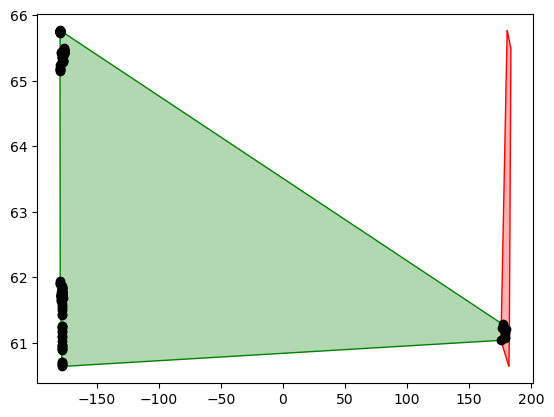

In [3]:
import matplotlib.pyplot as plt
import shapely.plotting as shpplt

fig, ax = plt.subplots()

shpplt.plot_points(MultiPoint([Point(x, y) for x, y in coords]),ax=ax, color='black')
shpplt.plot_polygon(best_hull,ax=ax, color='red', add_points=False)
shpplt.plot_polygon(hull_180,ax=ax, color='green', add_points=False)

In [3]:
len(df_out.fname.unique())

288

In [6]:
summary = df_out.describe(include='all')

summary

,eventID,occurrenceID,occurrenceStatus,basisOfRecord,organismID,eventDate,decimalLatitude,decimalLongitude,geodeticDatum,vernacularName,...,lifeStage,sex,associatedReferences,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,dataGeneralizations,bibliographicCitation,occurrenceRemarks,fname
count,48957,48957,48957,48957,48957,48957,48957.000000,48957.000000,48957,48957,...,48957,48957,48957,48946.000000,48957.0,48957.0,19075,48957,48957,48957
unique,288,48957,1,2,7,48831,NaN,NaN,1,7,...,6,3,288,NaN,NaN,NaN,10,288,288,288
top,atn_39489_bearded-seal_trajectory_20110616-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,present,MachineObservation,255021_spotted_seal,2014-05-25T06:01:09Z,NaN,NaN,EPSG:4326,spotted seal,...,sub-adult,female,https://doi.org/10.25921/wp4e-ph20; https://ww...,NaN,NaN,NaN,first of 2 records for this hour.,"Boveng, Peter; London, Josh; Cameron, Michael;...",This is a representative occurrence from a ful...,data/dwc\atn_39489_bearded-seal_trajectory_201...
freq,1663,1,48957,48938,24977,2,NaN,NaN,48957,24977,...,16238,24356,1663,NaN,NaN,NaN,13365,1663,1663,1663
mean,NaN,NaN,NaN,NaN,NaN,NaN,57.960772,-127.236920,NaN,NaN,...,NaN,NaN,NaN,2122.342990,0.0,0.0,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,14.659519,112.199144,NaN,NaN,...,NaN,NaN,NaN,3288.122944,0.0,0.0,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,14.804000,-179.998800,NaN,NaN,...,NaN,NaN,NaN,0.000000,0.0,0.0,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,59.552800,-174.200200,NaN,NaN,...,NaN,NaN,NaN,250.000000,0.0,0.0,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,62.119800,-167.800200,NaN,NaN,...,NaN,NaN,NaN,500.000000,0.0,0.0,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,65.035000,-158.366000,NaN,NaN,...,NaN,NaN,NaN,1500.000000,0.0,0.0,NaN,NaN,NaN,NaN


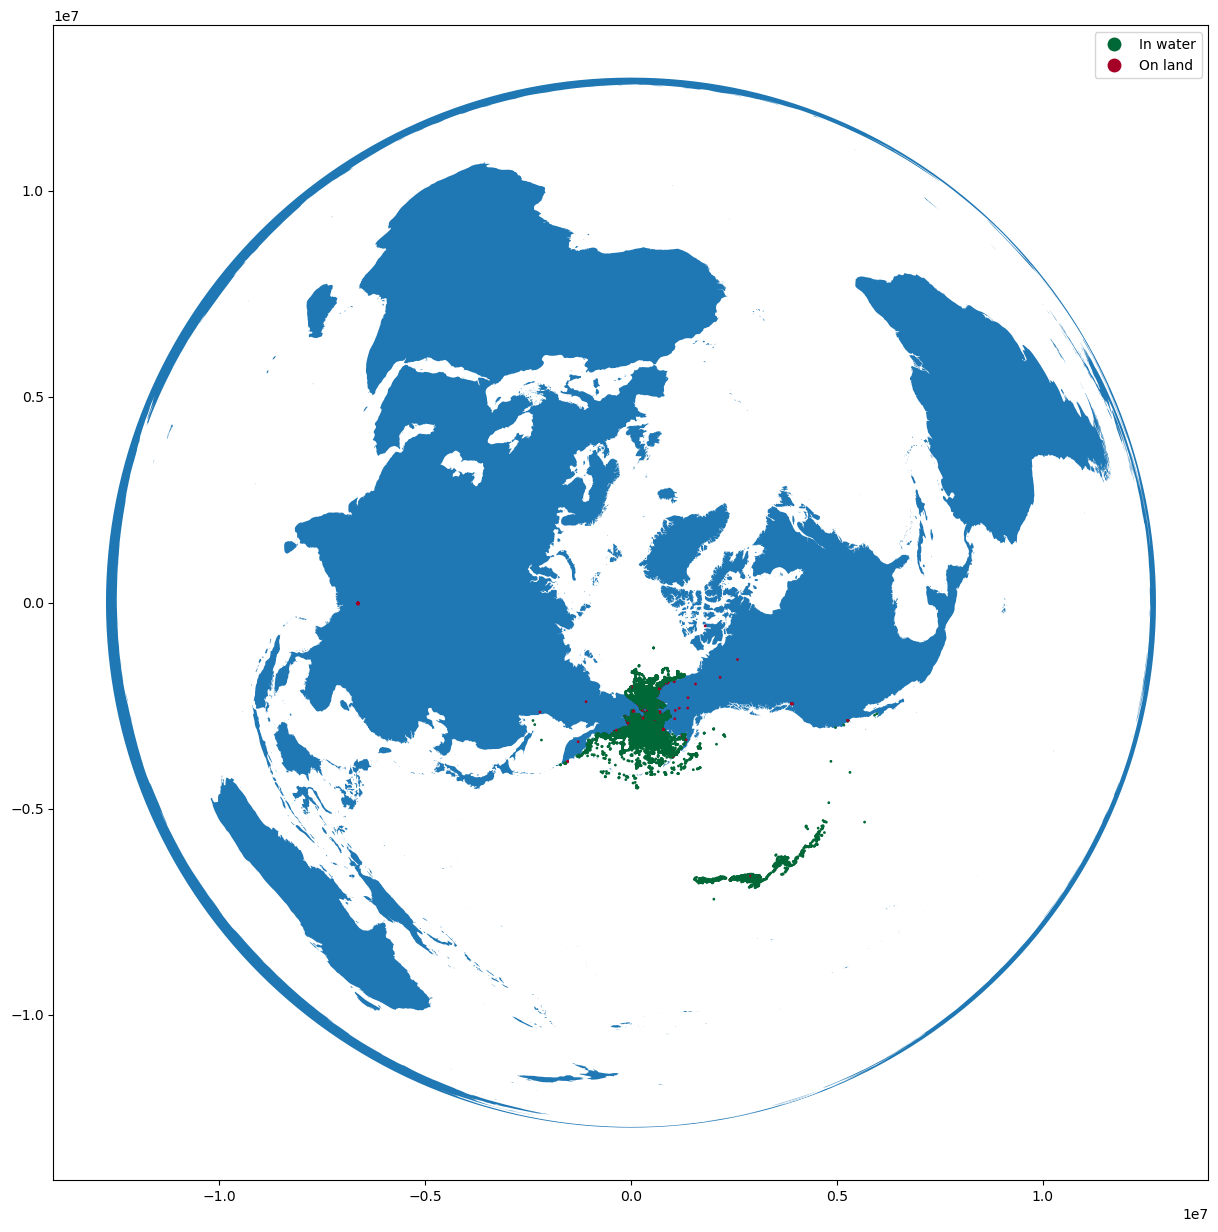

In [7]:
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep
import matplotlib.pyplot as plt

df_samp = df_out.copy()#.loc[df_out['fname'].str.contains('atn_37515')].copy()

df_samp['row'] = df_samp.index.to_numpy()+1

gdf = gpd.GeoDataFrame(df_samp, geometry=gpd.points_from_xy(df_samp.decimalLongitude, df_samp.decimalLatitude), crs = "EPSG:4326")

land_shp_fname = shpreader.natural_earth(resolution='50m',
                                        category='physical', name='land')

land_geom = unary_union(list(shpreader.Reader(land_shp_fname).geometries()))
land = prep(land_geom)

for index, row in gdf.iterrows():
    gdf.loc[index, 'on_land'] = land.contains(row.geometry)

fig, axs = plt.subplots(ncols=1,nrows=1, figsize=(20,15))
# Make a map:
xlim = ([gdf.total_bounds[0]-2,  gdf.total_bounds[2]+2])
ylim = ([gdf.total_bounds[1]-2,  gdf.total_bounds[3]+2])

# axs.set_xlim(xlim)
# axs.set_ylim(ylim)

to_crs = "EPSG:3571"

gpd.read_file(land_shp_fname).to_crs(to_crs).plot(ax=axs)

# gdf.loc[gdf['on_land']==False].plot(ax=axs, color='green', markersize=1, )
# gdf.loc[gdf['on_land']==True].plot(ax=axs, color='red', markersize=1, )
gdf.to_crs(to_crs).plot(ax=axs, 
         column='on_land', 
         cmap='RdYlGn_r', 
         categorical=True, 
         legend=True, 
         legend_kwds={"labels": ['In water','On land']}, 
         markersize=1)

# Collect some informational material about potential issues w/ data:
invalid_coord = []
if len(gdf.loc[gdf['on_land']==True]) > 0:
    invalid_coord.append('Row {} coordinates on land.'.format(gdf.loc[gdf['on_land'] == True,'row'].tolist()[0]))

req_cols = ['eventDate', 'decimalLongitude', 'decimalLatitude', 'scientificName', 'scientificNameID', 'occurrenceStatus', 'basisOfRecord']
missing_cols = []
for col in req_cols:
    if col not in gdf.columns:
        missing_cols.append('Column {} is missing.'.format(col))

# Add the information to the figure
# axs[1].text(0.25,0.25,'\n'.join(['\n'.join(missing_cols),'\n'.join(invalid_coord)]))
# axs[1].axis('off')
#plt.legend()#['In water','On land'])
plt.show()

In [ ]:
# m = gdf.loc[gdf['on_land']==True].explore(crs=4326)

# m.save('meta_analysis_map.html')

## Check event date

In [8]:
pd.to_datetime(df_out['eventDate']).describe()

count                                  48957
mean     2010-11-16 17:39:46.253242624+00:00
min                2005-04-05 00:43:17+00:00
25%                2009-07-13 05:31:08+00:00
50%                2010-02-10 04:49:28+00:00
75%                2011-11-18 00:05:48+00:00
max                2018-10-08 21:31:55+00:00
Name: eventDate, dtype: object

## Summarize all of the data

In [16]:
print(f'number of datasets: {len(df_out['fname'].unique())}')
print(f'number of occurrence records: {len(df_out)}')
print(f'number of unique species: {len(df_out['scientificName'].unique())}')
print(f'time duration covered by records: {pd.to_datetime(df_out['eventDate']).min().strftime('%Y')} to {pd.to_datetime(df_out['eventDate']).max().strftime('%Y')}')


number of datasets: 288
number of occurrence records: 48957
number of unique species: 7
time duration covered by records: 2005 to 2018


<Axes: xlabel='vernacularName'>

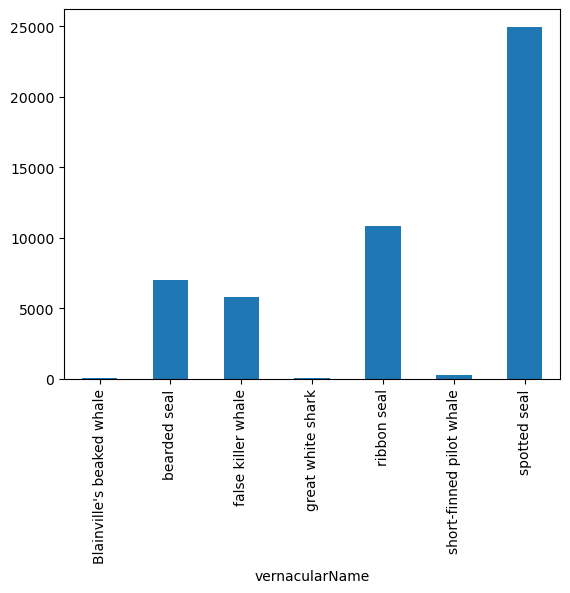

In [17]:
df_out.groupby(by='vernacularName').size().plot.bar()

## EMOFs

In [19]:
import pandas as pd
import glob

packages =  glob.glob('data/dwc/*/*emof.csv')

df_emof = pd.DataFrame()

for pkg in packages:
    #print(f"Reading {pkg}")
    df = pd.read_csv(pkg)
    if df.empty:
        print(f"  {pkg} is empty - skipping")
        #df_out = pd.concat([df_out,df], ignore_index=True)
    else:
        df['fname'] = pkg
        #print(f"  {len(df)} records")
        df_emof = pd.concat([df_emof,df], ignore_index=True)

df_emof

,eventID,occurrenceID,measurementValue,measurementType,measurementTypeID,measurementMethod,measurementUnit,measurementUnitID,fname
0,atn_131373_ribbon-seal_trajectory_20140428-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,28.399999618530273,animal_weight: mass of the animal as measured ...,http://vocab.nerc.ac.uk/collection/MVB/current...,28.4 (kg),kg,http://vocab.nerc.ac.uk/collection/P06/current...,data/dwc\atn_131373_ribbon-seal_trajectory_201...
1,atn_131373_ribbon-seal_trajectory_20140428-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,87.0,animal_length: length of the animal as measure...,http://vocab.nerc.ac.uk/collection/P01/current...,87.0 (cm) standard length,cm,http://vocab.nerc.ac.uk/collection/P06/current...,data/dwc\atn_131373_ribbon-seal_trajectory_201...
2,atn_131373_ribbon-seal_trajectory_20140428-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,13A0223,tag serial number,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_131373_ribbon-seal_trajectory_201...
3,atn_131373_ribbon-seal_trajectory_20140428-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,Wildlife Computers,tag manufacturer,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_131373_ribbon-seal_trajectory_201...
4,atn_131373_ribbon-seal_trajectory_20140428-201...,ioos_atn_131373_2014-04-28T01:48:24Z_0.0_ribbo...,SPLASH,tag make and model,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_131373_ribbon-seal_trajectory_201...
...,...,...,...,...,...,...,...,...,...
1429,atn_99312_ribbon-seal_trajectory_20100516-2010...,ioos_atn_99312_2010-05-18T04:53:48Z_0.0_ribbon...,143.0,animal_length: length of the animal as measure...,http://vocab.nerc.ac.uk/collection/P01/current...,143.0 (cm) standard length,cm,http://vocab.nerc.ac.uk/collection/P06/current...,data/dwc\atn_99312_ribbon-seal_trajectory_2010...
1430,atn_99312_ribbon-seal_trajectory_20100516-2010...,ioos_atn_99312_2010-05-18T04:53:48Z_0.0_ribbon...,10S0196,tag serial number,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_99312_ribbon-seal_trajectory_2010...
1431,atn_99312_ribbon-seal_trajectory_20100516-2010...,ioos_atn_99312_2010-05-18T04:53:48Z_0.0_ribbon...,Wildlife Computers,tag manufacturer,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_99312_ribbon-seal_trajectory_2010...
1432,atn_99312_ribbon-seal_trajectory_20100516-2010...,ioos_atn_99312_2010-05-18T04:53:48Z_0.0_ribbon...,SPOT,tag make and model,http://vocab.nerc.ac.uk/collection/MVB/current...,NaN,NaN,NaN,data/dwc\atn_99312_ribbon-seal_trajectory_2010...


## Events

In [8]:
import pandas as pd
import glob

packages =  glob.glob('data/dwc/*/*event.csv')

df_event = pd.DataFrame()

for pkg in packages:
    #print(f"Reading {pkg}")
    df = pd.read_csv(pkg)
    if df.empty:
        print(f"  {pkg} is empty - skipping")
        #df_out = pd.concat([df_out,df], ignore_index=True)
    else:
        df['fname'] = pkg
        #print(f"  {len(df)} records")
        df_event = pd.concat([df_event,df], ignore_index=True)

df_event

,eventID,eventDate,footprintWKT,minimumDepthInMeters,maximumDepthInMeters,eventType,countryCode,samplingProtocol,dynamicProperties,fname
0,atn_131373_ribbon-seal_trajectory_20140428-201...,2014-04-28T01:48:24Z/2014-12-13T04:12:29Z,"POLYGON ((175.2369 59.1798, -178.0619 60.6117,...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T21:06:34Z"", ""feat...",data/dwc\atn_131373_ribbon-seal_trajectory_201...
1,atn_137487_ribbon-seal_trajectory_20140412-201...,2014-04-12T04:50:01Z/2014-04-12T16:40:54Z,"POLYGON ((-177.921 60.668, -177.937 60.763, -1...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T20:57:32Z"", ""feat...",data/dwc\atn_137487_ribbon-seal_trajectory_201...
2,atn_137490_spotted-seal_trajectory_20160414-20...,2016-04-15T07:57:12Z/2016-07-11T00:33:49Z,"POLYGON ((58.7912 26.5185, -173.8166 51.567, -...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T21:13:52Z"", ""feat...",data/dwc\atn_137490_spotted-seal_trajectory_20...
3,atn_137491_spotted-seal_trajectory_20180418-20...,2018-04-18T04:45:00Z/2018-05-20T19:26:36Z,"POLYGON ((-164.4103 60.0306, -164.4277 60.0415...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T21:27:32Z"", ""feat...",data/dwc\atn_137491_spotted-seal_trajectory_20...
4,atn_137494_ribbon-seal_trajectory_20140426-201...,2014-04-26T00:51:11Z/2014-04-27T15:30:50Z,"POLYGON ((-178.0899 60.6317, -178.09 60.632, -...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T21:01:36Z"", ""feat...",data/dwc\atn_137494_ribbon-seal_trajectory_201...
...,...,...,...,...,...,...,...,...,...,...
283,atn_99305_spotted-seal_trajectory_20100522-201...,2010-05-24T20:03:09Z/2010-07-30T21:02:35Z,"POLYGON ((-176.303 59.359, -179.441 62.525, -1...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T20:53:32Z"", ""feat...",data/dwc\atn_99305_spotted-seal_trajectory_201...
284,atn_99306_ribbon-seal_trajectory_20100523-2010...,2010-05-24T01:12:09Z/2010-05-30T04:13:29Z,"POLYGON ((-175.734 59.213, -177.267 59.887, -1...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T20:56:33Z"", ""feat...",data/dwc\atn_99306_ribbon-seal_trajectory_2010...
285,atn_99309_ribbon-seal_trajectory_20100514-2010...,2010-05-18T04:19:42Z/2010-12-15T23:57:47Z,"POLYGON ((-176.261 59.277, -177.979 59.346, -1...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T20:48:32Z"", ""feat...",data/dwc\atn_99309_ribbon-seal_trajectory_2010...
286,atn_99310_bearded-seal_trajectory_20110617-201...,2011-06-18T20:50:10Z/2012-05-30T02:18:10Z,"POLYGON ((-179.654 63.019, -173.349 71.773, 17...",0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2024-08-28T00:25:11Z"", ""feat...",data/dwc\atn_99310_bearded-seal_trajectory_201...


In [10]:
print(df_event['dynamicProperties'][10])

{"date_created": "2025-05-27T20:59:36Z", "featureType": "trajectory", "cdm_data_type": "Trajectory", "Conventions": "CF-1.10, ACDD-1.3, IOOS-1.2, ATN Satellite Telemetry Specification v1.0", "argos_program_number": "522", "creator_email": "josh.london@noaa.gov", "id": "5352fb4fe36c4fb112fc6754", "tag_serial": "13U0097", "source": "Service Argos", "attachment": "flipper", "acknowledgement": "National Oceanic and Atmospheric Administration (NOAA) Integrated Ocean Observing System (IOOS), Axiom Data Science, Office of Naval Research (ONR), NOAA National Marine Fisheries Service (NMFS), Wildlife Computers, Argos, IOOS Animal Telemetry Network (ATN)", "creator_name": "Josh London", "creator_url": "https://orcid.org/0000-0002-3647-5046", "geospatial_lat_units": "degrees_north", "geospatial_lon_units": "degrees_east", "infoUrl": "https://portal.atn.ioos.us/#metadata/70c76508-b252-4c3d-9f27-e4cba9300537/project", "institution": "Marine Mammal Laboratory, NOAA Alaska Fisheries Science Center", 

<Axes: >

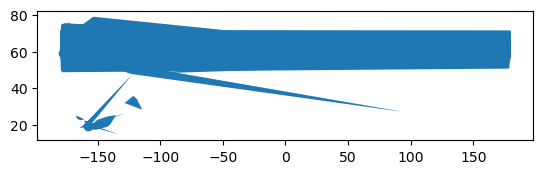

In [88]:
import geopandas as gpd
from shapely import wkt

df_event['geometry'] = df_event['footprintWKT'].apply(wkt.loads)

gdf = gpd.GeoDataFrame(df_event, geometry='geometry', crs="EPSG:4326")

gdf.plot()

In [89]:
import json

dict = json.loads(df_event['dynamicProperties'].iloc[0])

dict

{'date_created': '2025-05-27T21:06:34Z',
 'featureType': 'trajectory',
 'cdm_data_type': 'Trajectory',
 'Conventions': 'CF-1.10, ACDD-1.3, IOOS-1.2, ATN Satellite Telemetry Specification v1.0',
 'argos_program_number': '522',
 'creator_email': 'josh.london@noaa.gov',
 'id': '535db53984a8e004b84baae2',
 'source': 'Service Argos',
 'attachment': 'back',
 'acknowledgement': 'National Oceanic and Atmospheric Administration (NOAA) Integrated Ocean Observing System (IOOS), Axiom Data Science, Office of Naval Research (ONR), NOAA National Marine Fisheries Service (NMFS), Wildlife Computers, Argos, IOOS Animal Telemetry Network (ATN)',
 'creator_name': 'Josh London',
 'creator_url': 'https://orcid.org/0000-0002-3647-5046',
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'infoUrl': 'https://portal.atn.ioos.us/#metadata/70c76508-b252-4c3d-9f27-e4cba9300537/project',
 'institution': 'Marine Mammal Laboratory, NOAA Alaska Fisheries Science Center',
 'keywords': 

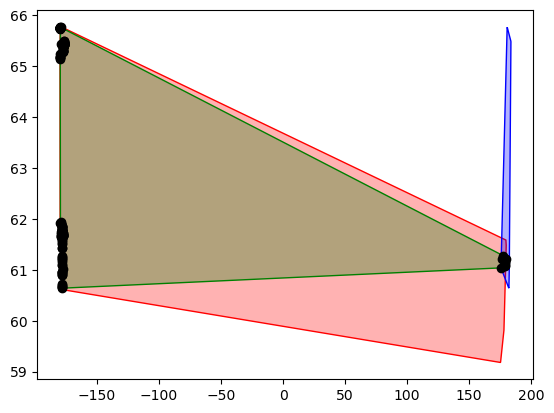

In [103]:
from shapely import to_wkt
polygon = wkt.loads(dict['geospatial_bounds'])

polygon

import matplotlib.pyplot as plt
import shapely.plotting as shpplt

fig, ax = plt.subplots()

shpplt.plot_points(MultiPoint([Point(x, y) for x, y in coords]),ax=ax, color='black')
shpplt.plot_polygon(polygon,ax=ax, color='red', add_points=False)
shpplt.plot_polygon(hull_180,ax=ax, color='green', add_points=False)
shpplt.plot_polygon(best_hull,ax=ax, color='blue', add_points=False)

In [109]:
df_event.loc[df_event['eventID'].str.contains('83916')]

,eventID,eventDate,footprintWKT,minimumDepthInMeters,maximumDepthInMeters,eventType,countryCode,samplingProtocol,dynamicProperties,fname,geometry
215,atn_83916_spotted-seal_trajectory_20090529-200...,2009-07-06T23:24:07Z/2009-07-06T23:24:07Z,POINT (-166.413 67.196),0.0,0.0,deployment,US,satellite telemetry,"{""date_created"": ""2025-05-27T20:17:33Z"", ""feat...",data/dwc\atn_83916_spotted-seal_trajectory_200...,POINT (-166.413 67.196)
